In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns',None)

In [3]:
df1=pd.read_excel('NID CT data.xlsx',sheet_name='Sheet2')
df1.head()

,ProjectName,Region,Metro,ProjectStatus,SiteType,DeploymentType,NetworkClassification,Priority,NIDPM,TFSID,CISID,BOMID,CommittedNetworkLiveDate,PlannedNetworkLiveDate,ProjectCode,FulfillmentId,CBEDate,CBEUrl,IsHLDProject,IsMainstream,IsCriticalPathProject,PrimaryTrackedSystem,LastUpdatedBy,LastUpdatedDate,PowerPhaseMW,DPM,CisProjectNameDNU,TFSTeamDNU,TFSSubstate,IsDeleted,FacilityCode,FacilityID,Colo,ProjectFolder,EPPMProjectCode,OverrideForecastedNWLive,IsMigrated,NeedByDate,ExpectedResumeDate,EffectiveDockDate,SKUName,NumberOfRacks,SignedOff,ClassType,NetworkLive,kickoff,CT
0,APAC | HK1 | DataCenter | Replace,APAC,NaN,Complete,DC,Replace,NaN,10.0,NaN,NaN,NaN,10000059,NaT,2018-08-06,3895252F-4B88-4293-A897-23099D179E14,NaN,NaN,NaN,NaN,0.0,NaN,Sitepro,system,2021-01-27 10:00:45.083,NaN,Nikhil Agasty (Tata Consultancy Services Ltd),NaN,NaN,NaN,NaN,HK1,297.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,Signed-Off,Class C,NaT,NaT,NaN
1,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,Complete,NaN,BuildPlan,NaN,2.0,NaN,20181100140,2518518370967779062_f0c54bf3-ad22-4dcb-8905-fd...,NaN,NaT,NaT,5868D114-D088-4F2B-8754-9BDB67ED1401,NaN,NaN,NaN,NaN,1.0,NaN,CIS,system,2020-12-02 05:31:26.936,NaN,NaN,NaN,NaN,NaN,1.0,BER20,2403.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Class C,2019-09-23 16:39:44.644,NaT,NaN
2,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,Complete,NaN,BuildPlan,NaN,2.0,NaN,20181100141,2518518370939217742_416297e4-4a9f-418f-b033-d8...,NaN,NaT,NaT,57DA29EE-C3A3-4B53-8399-2FEB642D41E7,NaN,NaN,NaN,NaN,1.0,NaN,CIS,system,2020-12-02 05:31:26.936,NaN,NaN,NaN,NaN,NaN,1.0,BER20,2403.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Class C,2019-09-23 16:40:44.874,NaT,NaN
3,BER20_FRA30_NEW RNG__Augment,EMEA,NaN,Complete,NaN,BuildPlan,NaN,2.0,NaN,20181100142,2518518370916356040_004ffb2f-499f-4b6e-8533-84...,NaN,NaT,NaT,EA225467-0926-46F4-960A-D29F13159A17,NaN,NaN,NaN,NaN,1.0,NaN,CIS,system,2020-12-02 05:31:26.936,NaN,NaN,NaN,NaN,NaN,1.0,BER20,2403.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Class C,2019-05-31 12:49:50.631,NaT,NaN
4,BL7_CLE30_UAL_MSFT_Augment,AMEREAST,NaN,Complete,NaN,UAL,NaN,0.0,NaN,20181100929,2518443429863713620_9feee323-ac94-4701-9661-12...,NaN,NaT,NaT,E70364CF-B5DC-46A5-AFA3-F34E79B14C6D,NaN,NaN,NaN,NaN,1.0,NaN,CIS,system,2020-12-02 05:31:26.936,NaN,NaN,NaN,NaN,NaN,1.0,BL7,2097.0,NaN,https://microsoft.sharepoint.com/teams/XFS/XFS...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,Class C,2019-05-24 23:53:17.033,NaT,NaN


In [4]:
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
   
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Feature Name'] = summary['index']
    summary = summary[['Feature Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['% Missing Values'] = np.round((df.isnull().sum().values/5030)*100,2)
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [5]:
summary_table(df1)

Dataset Shape: (5030, 47)


,Feature Name,dtypes,Missing Values,% Missing Values,Uniques Values
0,ProjectName,object,0,0.00,3676
1,Region,object,38,0.76,15
2,Metro,object,1663,33.06,405
3,ProjectStatus,object,0,0.00,1
4,SiteType,object,1553,30.87,10
5,DeploymentType,object,847,16.84,24
6,NetworkClassification,object,3345,66.50,6
7,Priority,float64,223,4.43,16
8,NIDPM,object,1794,35.67,71
9,TFSID,object,291,5.79,4577


In [6]:
df1.columns

Index(['ProjectName', 'Region', 'Metro', 'ProjectStatus', 'SiteType',
       'DeploymentType', 'NetworkClassification', 'Priority', 'NIDPM', 'TFSID',
       'CISID', 'BOMID', 'CommittedNetworkLiveDate', 'PlannedNetworkLiveDate',
       'ProjectCode', 'FulfillmentId', 'CBEDate', 'CBEUrl', 'IsHLDProject',
       'IsMainstream', 'IsCriticalPathProject', 'PrimaryTrackedSystem',
       'LastUpdatedBy', 'LastUpdatedDate', 'PowerPhaseMW', 'DPM',
       'CisProjectNameDNU', 'TFSTeamDNU', 'TFSSubstate', 'IsDeleted',
       'FacilityCode', 'FacilityID', 'Colo', 'ProjectFolder',
       'EPPMProjectCode', 'OverrideForecastedNWLive', 'IsMigrated',
       'NeedByDate', 'ExpectedResumeDate', 'EffectiveDockDate', 'SKUName',
       'NumberOfRacks', 'SignedOff', 'ClassType', 'NetworkLive', 'kickoff',
       'CT'],
      dtype='object')

In [7]:
#Selecting useful columns for further analysis
col=['Region', 'Metro', 'SiteType','DeploymentType', 'Priority', 'NIDPM','IsMainstream',
       'PrimaryTrackedSystem', 'FacilityCode','CT']

df2=df1[col]

In [7]:
df2.sample(5)

,Region,Metro,SiteType,DeploymentType,Priority,NIDPM,IsMainstream,PrimaryTrackedSystem,FacilityCode,CT
1730,AMERWEST,San Antonio,DC,NaN,3.0,Chad Jacobs,NaN,TFS,SN1,NaN
1363,EMEA,Tunis,NaN,NaN,2.0,Closed,NaN,TFS,Unknown,NaN
4857,AMERWEST,Quincy,DC,New Build,12.0,Matt Greenway,NaN,TFS,MWH05,672.0
4355,APAC,NaN,NaN,UAL,0.0,NaN,1.0,CIS,BJB,NaN
2399,AMERWEST,Bay,DC,Upgrade,20.0,Matt Greenway,0.0,TFS,BY4,771.0


In [12]:
export_summary=summary_table(df2)
export_summary

Dataset Shape: (5030, 10)


,Feature Name,dtypes,Missing Values,% Missing Values,Uniques Values
0,Region,object,38,0.76,15
1,Metro,object,1663,33.06,405
2,SiteType,object,1553,30.87,10
3,DeploymentType,object,847,16.84,24
4,Priority,float64,223,4.43,16
5,NIDPM,object,1794,35.67,71
6,IsMainstream,float64,1184,23.54,2
7,PrimaryTrackedSystem,object,0,0.00,4
8,FacilityCode,object,6,0.12,921
9,CT,float64,3216,63.94,565


In [13]:
df2['Priority'] = df2['Priority'].astype('object')
df2['IsMainstream']= df2['IsMainstream'].astype('object')

In [10]:
#export_summary.to_csv("NID_Data_Summary.csv",columns=export_summary.columns,index=0)

In [52]:
df3=df2[df2['CT']>=0]
df3.shape

(1814, 10)

In [53]:
CT_summary=pd.DataFrame(df3.describe())
CT_summary

,CT
count,1814.000000
mean,348.415656
std,237.845179
min,0.000000
25%,175.000000
50%,329.500000
75%,450.000000
max,1219.000000


In [54]:
CT_summary.to_csv('CT Summary.csv',columns=CT_summary.columns)

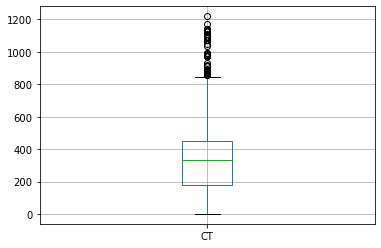

In [16]:
df3.boxplot(column="CT") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

<AxesSubplot:xlabel='CT', ylabel='Density'>

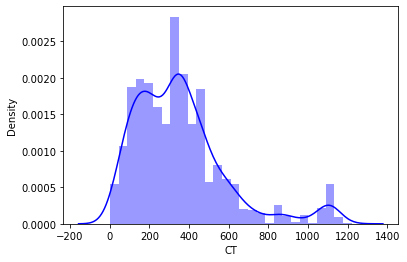

In [17]:
sns.distplot(df3["CT"], color="blue",kde=True) #Lets see the distribusion curve

In [18]:
df2.isnull().sum()

Region                    38
Metro                   1663
SiteType                1553
DeploymentType           847
Priority                 223
NIDPM                   1794
IsMainstream            1184
PrimaryTrackedSystem       0
FacilityCode               6
CT                      3216
dtype: int64

In [23]:
set1=['Region','Metro','SiteType','DeploymentType','IsMainstream','FacilityCode','CT']
df4=df2[set1]

In [27]:
df4['Region']=df4['Region'].fillna(df4['Region'].mode()[0])
df4['Metro']=df4['Metro'].fillna(df4['Metro'].mode()[0])
df4['SiteType']=df4['SiteType'].fillna(df4['SiteType'].mode()[0])
df4['DeploymentType']=df4['DeploymentType'].fillna(df4['DeploymentType'].mode()[0])
df4['IsMainstream']=df4['IsMainstream'].fillna("Unknown")
df4['FacilityCode']=df4['FacilityCode'].fillna(df4['FacilityCode'].mode()[0])
df4['CT']=df4['CT'].fillna(df4['CT'].median())

In [37]:
value={0:'False',1:'True'}
df4['IsMainstream'].replace(value,inplace=True)

In [38]:
df4.head()

,Region,Metro,SiteType,DeploymentType,IsMainstream,FacilityCode,CT
0,APAC,Cheyenne,DC,Replace,False,HK1,329.5
1,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5
2,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5
3,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5
4,AMEREAST,Cheyenne,DC,UAL,True,BL7,329.5


In [39]:
summary_table(df4)

Dataset Shape: (5030, 7)


,Feature Name,dtypes,Missing Values,% Missing Values,Uniques Values
0,Region,object,0,0.0,15
1,Metro,object,0,0.0,405
2,SiteType,object,0,0.0,10
3,DeploymentType,object,0,0.0,24
4,IsMainstream,object,0,0.0,3
5,FacilityCode,object,0,0.0,921
6,CT,float64,0,0.0,566


In [73]:
set2=['Region','Metro','SiteType','DeploymentType','IsMainstream','FacilityCode']
df5=df4[set2]

In [74]:
df5.head()

,Region,Metro,SiteType,DeploymentType,IsMainstream,FacilityCode
0,APAC,Cheyenne,DC,Replace,False,HK1
1,EMEA,Cheyenne,DC,BuildPlan,True,BER20
2,EMEA,Cheyenne,DC,BuildPlan,True,BER20
3,EMEA,Cheyenne,DC,BuildPlan,True,BER20
4,AMEREAST,Cheyenne,DC,UAL,True,BL7


In [57]:
summary_table(df5)

Dataset Shape: (5030, 6)


,Feature Name,dtypes,Missing Values,% Missing Values,Uniques Values
0,Region,object,0,0.0,15
1,Metro,object,0,0.0,405
2,SiteType,object,0,0.0,10
3,DeploymentType,object,0,0.0,24
4,IsMainstream,object,0,0.0,3
5,FacilityCode,object,0,0.0,921


The k-means based methods are efficient for processing large data sets, but they are often limited to numeric data. Kmeans optimize a cost function defined on the Euclidean distance
measure between data points and means of clusters. Minimizing the cost function by
calculating means limits their use to numeric data.

This is where K-Prototype shines. When applied to numeric data the algorithm is identical to k-means. For categorical data algorithm uses a simple matching dissimilarity measure
, replaces the means of clusters with modes, and uses a frequency-based method to
update modes in the clustering process to minimize the clustering cost function.

In [63]:
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

In [66]:
#Input to the kprototype is numpy array
mark_array=df4.values
mark_array1=df5.values

In [41]:
#Declaring the numerical variable
mark_array[:, 6] = mark_array[:, 6].astype(float)

In [42]:
mark_array

array([['APAC', 'Cheyenne', 'DC', ..., 'False', 'HK1', 329.5],
       ['EMEA', 'Cheyenne', 'DC', ..., 'True', 'BER20', 329.5],
       ['EMEA', 'Cheyenne', 'DC', ..., 'True', 'BER20', 329.5],
       ...,
       ['APAC', 'Cheyenne', 'DC', ..., 'False', 'KUL30', 329.5],
       ['APAC', 'Cheyenne', 'DC', ..., 'False', 'KUL30', 329.5],
       ['APAC', 'Cheyenne', 'DC', ..., 'False', 'KUL30', 329.5]],
      dtype=object)

In [43]:
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0,1,2,3,4,5])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 339, ncost: 23522368.86725001
Run: 1, iteration: 2/20, moves: 69, ncost: 22707082.08963542
Run: 1, iteration: 3/20, moves: 42, ncost: 22269628.400451943
Run: 1, iteration: 4/20, moves: 19, ncost: 22192133.125223957
Run: 1, iteration: 5/20, moves: 2, ncost: 22190942.56735294
Run: 1, iteration: 6/20, moves: 0, ncost: 22190942.56735294
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 533, ncost: 26430000.1938393
Run: 2, iteration: 2/20, moves: 169, ncost: 23177451.49319952
Run: 2, iteration: 3/20, moves: 53, ncost: 22619064.08657612
Run: 2, iteration: 4/20, moves: 48, ncost: 22200817.662484698
Run: 2, iteration: 5/20, moves: 9, ncost: 22190942.56735294
Run: 2, iteration: 6/20, moves: 0, ncost: 22190942.56735294
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, mo

In [44]:
print(kproto.cluster_centroids_)

[array([[136.11826347],
       [857.67487685],
       [343.03029574]]), array([['APAC', 'Tokyo', 'RNG', 'Aug', 'False', 'CYS04'],
       ['AMEREAST', 'Boydton', 'CLS/ILA', 'New Build', 'False', 'DSM05'],
       ['EMEA', 'Cheyenne', 'DC', 'BuildPlan', 'False', 'Unknown']],
      dtype='<U9')]


In [45]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [46]:
df4['cluster']=cluster_dict

In [47]:
df4.head()

,Region,Metro,SiteType,DeploymentType,IsMainstream,FacilityCode,CT,cluster
0,APAC,Cheyenne,DC,Replace,False,HK1,329.5,2
1,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5,2
2,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5,2
3,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5,2
4,AMEREAST,Cheyenne,DC,UAL,True,BL7,329.5,2


In [48]:
df4[df4['cluster']== 0].head(10)

,Region,Metro,SiteType,DeploymentType,IsMainstream,FacilityCode,CT,cluster
930,AMEREAST,Des Moines,DC,Expansion,False,DM4,226.0,0
932,AMEREAST,Des Moines,DC,Expansion,False,DM4,226.0,0
934,AMEREAST,Des Moines,DC,Expansion,False,DM4,226.0,0
939,AMEREAST,Campinas,RNG,Aug,False,CPQ02,91.0,0
940,AMERWEST,Los Angeles,GW,Upgrade,False,LAX30,117.0,0
956,AMEREAST,Santiago,Edge,Optics,False,SCL30,49.0,0
957,APAC,Mumbai,Edge,Optics,False,BOM02,157.0,0
960,AMERWEST,Dallas,Edge,Expansion,False,DAL,192.0,0
961,APAC,Hong Kong,Edge,Optics,False,HKG30,78.0,0
962,AMEREAST,New York,RNG,Upgrade,False,NYC30,157.0,0


In [49]:
df4[df4['cluster']== 1].head(10)

,Region,Metro,SiteType,DeploymentType,IsMainstream,FacilityCode,CT,cluster
972,AMERWEST,Phoenix,DC,New Build,Unknown,PHX20,616.0,1
1027,EMEA,Rome,Edge,New Build,False,ROM30,652.0,1
1245,EMEA,Rome,Edge,New Build,False,ROM30,652.0,1
1315,EMEA,Stockholm,GW,New Build,True,STO30,620.0,1
1320,EMEA,Stockholm,GW,New Build,True,STO31,620.0,1
1347,EMEA,Stockholm,Edge,New Build,True,STO,623.0,1
1590,EMEA,Dublin,DC,New Build,False,DUB21,733.0,1
1617,AMEREAST,Atlanta,GW,New Build,False,ATL31,637.0,1
1618,AMEREAST,Atlanta,GW,New Build,False,ATL30,868.0,1
1623,EMEA,Hamburg,GW,New Build,False,HAM30,649.0,1


In [50]:
df4[df4['cluster']== 2].head(10)

,Region,Metro,SiteType,DeploymentType,IsMainstream,FacilityCode,CT,cluster
0,APAC,Cheyenne,DC,Replace,False,HK1,329.5,2
1,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5,2
2,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5,2
3,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5,2
4,AMEREAST,Cheyenne,DC,UAL,True,BL7,329.5,2
5,AMERWEST,Phoenix,DC,Expansion,False,PHX10,329.5,2
6,AMERWEST,Houston,Edge,Aug,Unknown,HOU01,329.5,2
7,AMERWEST,Hayward,CLS/ILA,Upgrade,False,HWD70,329.5,2
8,EMEA,Cheyenne,DC,BuildPlan,True,BER20,329.5,2
9,AMERWEST,Bay,DC,New Build,Unknown,SJC21,295.0,2


In [51]:
df4.to_csv('Imputed_Data.csv',index=0,columns=df4.columns)

In [67]:
mark_array1

array([['APAC', 'Cheyenne', 'DC', 'Replace', 'False', 'HK1'],
       ['EMEA', 'Cheyenne', 'DC', 'BuildPlan', 'True', 'BER20'],
       ['EMEA', 'Cheyenne', 'DC', 'BuildPlan', 'True', 'BER20'],
       ...,
       ['APAC', 'Cheyenne', 'DC', 'BuildPlan', 'False', 'KUL30'],
       ['APAC', 'Cheyenne', 'DC', 'BuildPlan', 'False', 'KUL30'],
       ['APAC', 'Cheyenne', 'DC', 'BuildPlan', 'False', 'KUL30']],
      dtype=object)

In [89]:
#All columns are categorical, use k-modes instead of k-prototypes
kmod= KModes(n_clusters=6, verbose=2, max_iter=50)
kmodes_clusters = kmod.fit_predict(mark_array1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/50, moves: 461, cost: 15924.0


In [90]:
kmodes_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [91]:
print(kmod.cluster_centroids_)

[['EMEA' 'Cheyenne' 'DC' 'BuildPlan' 'False' 'Unknown']
 ['APAC' 'Sydney' 'DC' 'New Build' 'Unknown' 'Unknown']
 ['APAC' 'Cheyenne' 'DC' 'BuildPlan' 'True' 'HKG20']
 ['AMEREAST' 'Cheyenne' 'RNG' 'BuildPlan' 'Unknown' 'Unknown']
 ['AMERWEST' 'Cheyenne' 'DC' 'UAL' 'True' 'CYS04']
 ['AMERWEST' 'San Antonio' 'DC' 'BuildPlan' 'Unknown' 'SN1']]


In [92]:
cluster_dict1=[]
for c in kmodes_clusters:
    cluster_dict1.append(c)

In [93]:
df5['cluster']=cluster_dict1

In [94]:
df5.sample(10)

,Region,Metro,SiteType,DeploymentType,IsMainstream,FacilityCode,cluster
3099,AMERWEST,Quincy,DC,BuildPlan,Unknown,40USA,5
1200,AMERWEST,Los Angeles,GW,New Build,Unknown,LAX30,1
3317,APAC,Sydney,DC,Expansion,False,SYD26,1
4078,AMERWEST,Quebec,DC,Expansion,False,YQB20,0
1354,APAC,Sydney,AZNG,New Build,True,SYD03,1
1822,APAC,Hong Kong,DC,New Build,False,HK4,1
1400,EMEA,Tehran,DC,BuildPlan,Unknown,Unknown,0
1149,AMERWEST,San Antonio,Edge,New Build,Unknown,Unknown,1
628,AMERWEST,Cheyenne,DC,BuildPlan,True,PDX30,2
584,AMERWEST,Cheyenne,DC,BuildPlan,True,DAL,2


In [95]:
df5.to_csv('Imputed_cluters.csv',index=0,columns=df5.columns)